<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/%5BSSH%5Dlab07_CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 7 (Image Processing using Convolutional Neural Networks)
- CIFAR10 dataset (see https://www.cs.toronto.edu/~kriz/cifar.html for more info)
- 60K images: 50K train, 10K test
- 10 classes: 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
- Perform multi-class classification with evaluation accuracy on EACH class

**CONNECT TO GPU** before continuing, but just CPU is also fine, it might be a bit slow.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Device Configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [3]:
# Hyper parameters

num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [5]:
# Download and prepare dataset
# Transform them to tensors and normalize them
# 이부분 코드 해석 다시한번

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )])

In [6]:
# 2.2 Download data
#transform이 뭐 였는지

train_set = torchvision.datasets.CIFAR10('./', train = True, download = True, transform = transform)
test_set = torchvision.datasets.CIFAR10('./', train = False, download = True, transform = transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [8]:
# 2.3 Use DataLoader to get batches and shuffle
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle = False)

 # why are these tuple, not list?

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Q1. Why are there 3 values in each list of the Normalize() function? What does each value and each list represent?
# A1. I think since the data has three dimensions(channel, width, height), each value means mean and std for each dimension.

### Inspect the Images

In [10]:
# Access the first data sample in the train_set using next(iter())
batch = next(iter(train_loader))
print(f'Image values: \n{batch}')
print(f'Length : {len(batch)}')
print(f'Type : {type(batch)}')

Image values: 
[tensor([[[[ 0.2078,  0.3333,  0.4745,  ..., -0.0510, -0.1294, -0.1922],
          [ 0.3020,  0.3882,  0.4902,  ..., -0.4118, -0.3882, -0.3333],
          [ 0.3647,  0.3333,  0.3333,  ..., -0.5216, -0.5216, -0.5059],
          ...,
          [-0.6706, -0.7725, -0.8980,  ..., -0.5059, -0.6000, -0.6549],
          [-0.7804, -0.8902, -0.8196,  ..., -0.6627, -0.6627, -0.6941],
          [-0.9059, -0.8275, -0.4588,  ..., -0.6784, -0.6784, -0.7333]],

         [[ 0.2314,  0.3176,  0.4353,  ..., -0.0039, -0.0667, -0.1137],
          [ 0.3490,  0.4196,  0.4902,  ..., -0.3725, -0.3490, -0.3020],
          [ 0.4118,  0.3961,  0.3569,  ..., -0.4902, -0.5137, -0.5373],
          ...,
          [-0.5922, -0.7333, -0.8667,  ..., -0.4745, -0.5608, -0.5843],
          [-0.6863, -0.8118, -0.7412,  ..., -0.6314, -0.6235, -0.6392],
          [-0.8118, -0.7020, -0.3176,  ..., -0.6471, -0.6392, -0.7020]],

         [[ 0.3176,  0.3647,  0.4510,  ...,  0.1765,  0.0745, -0.0275],
          [ 0.

In [11]:
# This means the data contains image-label paris
# Unpack them
images, labels = batch

# Same as these two lines:
# image = batch[0]
# label = batch[1]

In [12]:
print(images.shape) # each batch has 4 images, each image has 3 channels, and size of the image is 32*32
print(labels)

torch.Size([4, 3, 32, 32])
tensor([3, 5, 9, 6])


In [13]:

# Q2. What is the range of the values for the normalised image pixels?
# A2. Since it is normalized, its range is between -1 and 1 

# Q3. What does each index value of the shape of the image represent?
# A3. It is pixcel value that represent how strong(black and white) it is. 

# Q4. What do the label values represent?
# A4. It represents which class the sample data is. 

### View some images
- Note that images have been normalised and may not look very clear

In [18]:
# Create a grid
plt.figure(figsize=(12,12))
grid = torchvision.utils.make_grid(tensor=images, nrow=4)

print(f'class labels: {labels}')

class labels: tensor([3, 5, 9, 6])


<Figure size 864x864 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


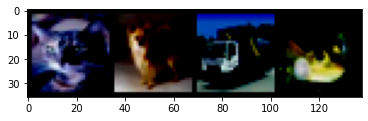

In [19]:
# Use grid.permute() to transpose the grid so that the axes meet the specificications required by
# plt.imshow() which are [height, width, channels]. Pytorch dimenstions are [channels, height, width]
plt.imshow(grid.permute(1,2,0))

## CNN model

In [ ]:
(32-4)/2

14.0

In [ ]:
16*25

400

In [20]:
class Test(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5, padding = 1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # Flatten 3D tensor to 1D tensor
    self.fc1 = nn.Linear(16*5*5, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64,10) # Final output matches num_classes

  def forward(self,x):
    # conv + relu + pool
    print(f'Input shape: {x.shape}')
    out = self.conv1(x)
    print(f'After Conv1: {out.shape}')
    print(f'Padding : {self.conv1.padding}')
    out = self.pool(F.relu(out))
    print(f'After Pool1: {out.shape}')
    out = self.conv2(out)
    print(f'After Conv2 : {out.shape}')
    out = self.pool(F.relu(out))
    print(f'After Pool2: {out.shape}')
    # Flatten it before fc1
    out = out.reshape(-1,400)
    print(f'Before fc1 : {out.shape}')
    out = self.fc1(out)
    out = self.relu(out)
    print(f'After fc1: {out.shape}')
    out = self.fc2(out)
    out = self.relu(out)
    print(f'After fc2: {out.shape}')
    out = self.fc3(out) # NO softmax as it will be included in CrossEntropyLoss
    print(f'After fc3: {out.shape}')
    return out


In [21]:
model = Test().to(device) 

# Let's view the softmax output
probs = nn.Softmax(dim = 1)

In [22]:
# Q5. What do the three arguments of the first convolutional layer, conv1 represent (3,6,5)? 
# A5. 3 means input data has 3 channels, 6 means that we want to get 6 feature maps using 6 filters, and 5 means that the filter size is 5*5

# Q6. Explain the arguments of the second convolutional layer, conv2 (6, 16, 5) 
# A6. As in the answer a5, 6 means that the input channels is 6, 16 means than we want to get 16 feature maps using 16 filters, and 5 means that the filter size is 5*5

# Q7. Figure out the convolved image size after conv1
# Convolved image size = ((input_width - filter_size + 2 * padding) / stride) + 1
# A7. (32-5)/1 + 1= 28

# Q8. Figure out the input size to the first fcn layer and fill out the code above in init() and forward()
# A8. After conv1= 28, after max pooling = 28/2 = 14, after conv2 = (14-5)/1+1 = 10 , after max pooling = 10/2 = 5
# It is 400(= 16*5*5)


### Run through a sample batch

In [23]:
sample = next(iter(train_loader))

images, labels = sample

images = images.to(device)
labels = labels.to(device)

output = model(images)

Input shape: torch.Size([4, 3, 32, 32])
After Conv1: torch.Size([4, 6, 30, 30])
Padding : (1, 1)
After Pool1: torch.Size([4, 6, 15, 15])
After Conv2 : torch.Size([4, 16, 11, 11])
After Pool2: torch.Size([4, 16, 5, 5])
Before fc1 : torch.Size([4, 400])
After fc1: torch.Size([4, 128])
After fc2: torch.Size([4, 64])
After fc3: torch.Size([4, 10])


In [24]:
print(f'Output shape: {output.shape}')
print(f'Softmax outputs: \n{probs(output)}')

Output shape: torch.Size([4, 10])
Softmax outputs: 
tensor([[0.1083, 0.1113, 0.1072, 0.1002, 0.1011, 0.1072, 0.0903, 0.0889, 0.0939,
         0.0916],
        [0.1074, 0.1111, 0.1075, 0.1007, 0.1012, 0.1072, 0.0904, 0.0892, 0.0941,
         0.0913],
        [0.1080, 0.1111, 0.1070, 0.1009, 0.1009, 0.1066, 0.0910, 0.0885, 0.0943,
         0.0916],
        [0.1087, 0.1105, 0.1070, 0.1003, 0.1008, 0.1074, 0.0910, 0.0885, 0.0946,
         0.0913]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [25]:
# Q9. Explain the shape of the output after conv1
# A9. The shape of output is 4 * 10. Each batch has 4 images and 10 classes.

# Q10. What does the pooling do to the dimensions of the feature images here?
# A10. Pooling does not change the number of channels, but it decreases the height and width of the image.

# Q11. Add padding=1 to conv1 and rerun the last two code cells. How did padding affect the dimensions of the feature images?
# A11. With padding(=1) the size after conv1 decreases not as much as the one without padding. It helps not to shrink the size of image after convolution.

# Q12. What is represented by each list returned by Softmax outputs?
# A12. Each value can be interpreted as probability that the image falls into each category. When summing each list up, the sumed value is 1. 


### Let's Train!
- Now that we know and understand how CNNs work, let's put everything together for CIFAR-10 dataset
  - Download the data in batches and normalisation with shuffling
  - Build a model with 2 CNN layers containing ReLU and pooling
  - Passing the feature images to 3 fully connected layers (FCNs) also containing RELU activation
  - The final layer has 10 units to reprsent the number of output classes
  - Use Binary Cross Entropy Loss and SGD optimiser
  - Evaluate the model on the test data on EACH class

**IMPORTANT!** Fill out the missing code below before training 

In [26]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # Flatten 3d tensor to 1d tensor
    self.fc1 = nn.Linear(400, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    # conv + relu + pooling
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    # Flatten it before fc1
    out = out.reshape(-1, 400)
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) # No softmax as it will be included in CrossEntrooyLoss
    return out
    

In [32]:
model = CNN().to(device)

# Q13. Use the Cross Entropy Loss for this task (UNCOMMENT & COMPLETE CODE BELOW)

criterion = nn.CrossEntropyLoss()

# Q14. Use the Stochastic Gradient Descent (SGD) optimiser, this time ADD momentum=0.9 (UNCOMMENT & COMPLETE CODE BELOW)

import torch.optim as optim
opt = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

## Training loop

In [29]:
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps//batch_size)

In [34]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #print(images.shape) # [4, 3, 32, 32] -> batch size, channels, img, dim
    images = images.to(device)
    labels = labels.to(device)

    # Forward Pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward Pass and Optimaze
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, iteration {i+1}/{n_iterations}, Loss = {loss.item():.4f}')

Epoch 1/4, iteration 1000/12500, Loss = 2.3486
Epoch 1/4, iteration 2000/12500, Loss = 1.9929
Epoch 1/4, iteration 3000/12500, Loss = 1.4207
Epoch 1/4, iteration 4000/12500, Loss = 1.8180
Epoch 1/4, iteration 5000/12500, Loss = 2.3399
Epoch 1/4, iteration 6000/12500, Loss = 1.7247
Epoch 1/4, iteration 7000/12500, Loss = 1.0013
Epoch 1/4, iteration 8000/12500, Loss = 1.3204
Epoch 1/4, iteration 9000/12500, Loss = 1.3470
Epoch 1/4, iteration 10000/12500, Loss = 1.5193
Epoch 1/4, iteration 11000/12500, Loss = 1.6846
Epoch 1/4, iteration 12000/12500, Loss = 1.9636
Epoch 2/4, iteration 1000/12500, Loss = 1.6956
Epoch 2/4, iteration 2000/12500, Loss = 0.4733
Epoch 2/4, iteration 3000/12500, Loss = 0.3573
Epoch 2/4, iteration 4000/12500, Loss = 1.5654
Epoch 2/4, iteration 5000/12500, Loss = 1.3031
Epoch 2/4, iteration 6000/12500, Loss = 1.8813
Epoch 2/4, iteration 7000/12500, Loss = 1.0318
Epoch 2/4, iteration 8000/12500, Loss = 1.7331
Epoch 2/4, iteration 9000/12500, Loss = 2.3134
Epoch 2/4,

## Evaluation

In [45]:
# Deactivate the autograd engine to reduce memory usage and speed up computaions(backprop disabled).

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]

  # Loop through test set
  for images, labels in test_loader:
    # put images on GPU
    images = images.to(device)
    labels = labels.to(device)

    # Run on trained model
    outputs = model(images)

    # Get predictions
    # torch.max() returns actual probability value(we will ignore) and index or class label(selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) #different to FFNN
    n_correct += (y_preds == labels).sum().item()

    # Keep track of each class
    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1
  
  # Print Accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc}%')

  for i in range(len(classes)):
    acc = 100 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc}%')

Test Accuracy of the WHOLE CNN = 59.0%
Accuracy of plane: 73.1%
Accuracy of car: 77.3%
Accuracy of bird: 41.8%
Accuracy of cat: 31.6%
Accuracy of deer: 48.8%
Accuracy of dog: 53.8%
Accuracy of frog: 69.0%
Accuracy of horse: 65.6%
Accuracy of ship: 68.7%
Accuracy of truck: 60.3%


In [46]:
# Q15. Why don't we need to reshape the input images when training and testing?
# A15. Convolution does not require the input image's size to be the same, if the size is different the feature representation's size would be different. 

# Q16. Try to improve the model performance, e.g. by increasing the epochs, changing batch size, adding convolutions, etc.
# Provide the code chunk showing the improved accuracy on the test set below. What changes did you make?
# I added the number of channels and increased the number of epochs and the accuracy got better.


In [ ]:
32*5*5

800

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, 5)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 32, 5) 
    self.fc1 = nn.Linear(800, 128) 
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
  def forward(self, x):
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    out = out.reshape(-1,800)
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out) 
    return out


model = CNN().to(device)
criterion = nn.CrossEntropyLoss()

import torch.optim as optim
opt = optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)


In [ ]:
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

num_epochs = 20

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    opt.zero_grad()
    loss.backward()
    opt.step()

    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')



Epoch 1/20, Iteration 1000/12500, Loss=1.8632 
Epoch 1/20, Iteration 2000/12500, Loss=1.4589 
Epoch 1/20, Iteration 3000/12500, Loss=1.4120 
Epoch 1/20, Iteration 4000/12500, Loss=1.2773 
Epoch 1/20, Iteration 5000/12500, Loss=1.7751 
Epoch 1/20, Iteration 6000/12500, Loss=2.1460 
Epoch 1/20, Iteration 7000/12500, Loss=3.5957 
Epoch 1/20, Iteration 8000/12500, Loss=2.9298 
Epoch 1/20, Iteration 9000/12500, Loss=1.2691 
Epoch 1/20, Iteration 10000/12500, Loss=2.0648 
Epoch 1/20, Iteration 11000/12500, Loss=1.1605 
Epoch 1/20, Iteration 12000/12500, Loss=1.9191 
Epoch 2/20, Iteration 1000/12500, Loss=1.1586 
Epoch 2/20, Iteration 2000/12500, Loss=1.4299 
Epoch 2/20, Iteration 3000/12500, Loss=1.6216 
Epoch 2/20, Iteration 4000/12500, Loss=0.8608 
Epoch 2/20, Iteration 5000/12500, Loss=0.7561 
Epoch 2/20, Iteration 6000/12500, Loss=0.7704 
Epoch 2/20, Iteration 7000/12500, Loss=1.2427 
Epoch 2/20, Iteration 8000/12500, Loss=2.3069 
Epoch 2/20, Iteration 9000/12500, Loss=0.5763 
Epoch 2/20

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images) 

    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) 
    n_correct += (y_preds == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


Test Accuracy of the WHOLE CNN = 68.85 %
Accuracy of plane: 76.4 %
Accuracy of car: 79.0 %
Accuracy of bird: 51.7 %
Accuracy of cat: 49.3 %
Accuracy of deer: 67.5 %
Accuracy of dog: 55.8 %
Accuracy of frog: 73.1 %
Accuracy of horse: 76.7 %
Accuracy of ship: 78.6 %
Accuracy of truck: 80.4 %
